In [1]:
import sys
sys.path.append('../')
sys.path.append('../src/')

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

from src.utils import load_moons, load_monk1, load_mnist
from src.network import Network
from src.activations import ReLU, Tanh, Sigmoid
from src.losses import MeanSquaredError
from src.metrics import BinaryAccuracy, MulticlassAccuracy, MeanEuclideanError
from src.regularizers import L2, L1
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from src.callbacks import EarlyStopping, Callback

In [2]:
x_train, x_val, x_test, y_train, y_val, y_test = load_moons(validation=True, noise=0.2)

In [3]:
model = Network(2, regularizer=L1(1e-9))
model.add_layer(8, ReLU())
model.add_layer(1, Tanh())

# create stats
stats = model.train(train=(x_train, y_train), validation=(x_val, y_val), metric=BinaryAccuracy(), loss=MeanSquaredError(), epochs=100, eta=0.1, nesterov=0.1)

Training: 100%|██████████| 100/100[, loss=0.0412, val_loss=0.0437, val_acc=0.96]

<AxesSubplot: >

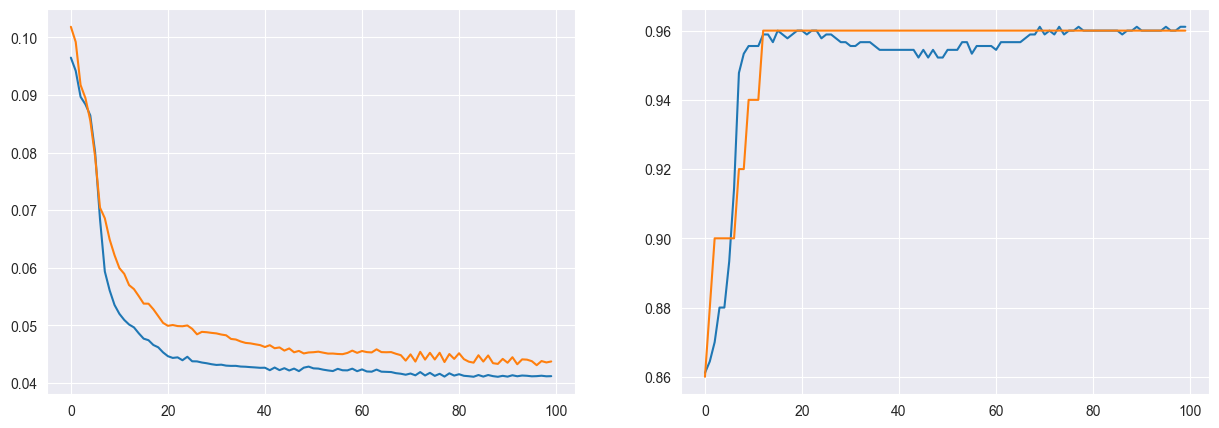

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

In [ ]:
predictions = model.multiple_outputs(x_test)

accuracy_score(y_test.flatten(), np.round(predictions.flatten()))

In [2]:
x_train, x_val, x_test, y_train, y_val, y_test = load_monk1()

In [3]:
model = Network(17)
model.add_layer(6, ReLU())
model.add_layer(1, Tanh())
stats = model.train((x_train, y_train), (x_test, y_test), metric=BinaryAccuracy(), loss=MeanSquaredError(), epochs=1000, eta=0.1, nesterov=0.5, callbacks=[EarlyStopping(patience=10)])

Training:  58%|█████▊    | 578/1000[, loss=0.0507, val_loss=0.106, val_acc=0.866]

KeyboardInterrupt: 

<AxesSubplot: >

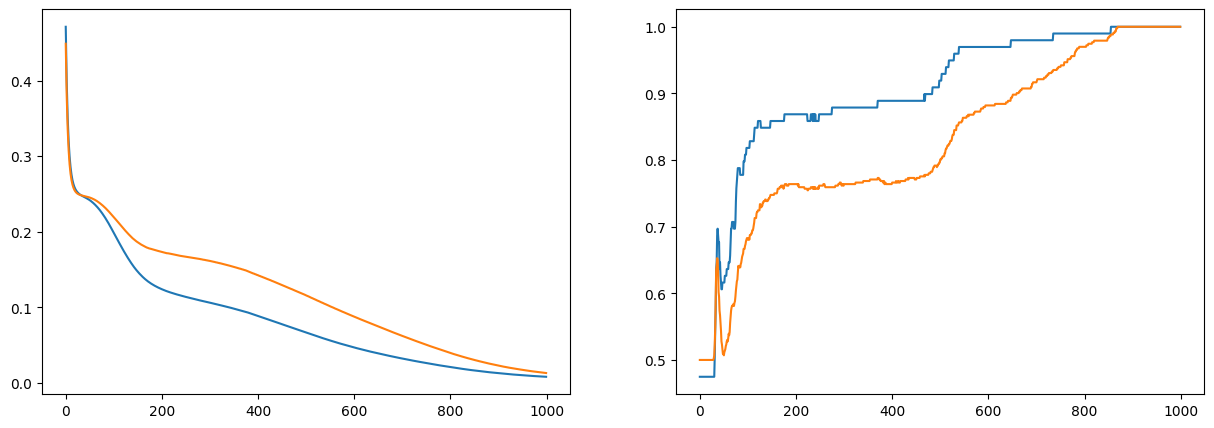

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])


In [ ]:
x_train, x_test, y_train, y_test = load_mnist()

In [ ]:
model = Network(64)
model.add_layer(16, ReLU())
model.add_layer(10, Sigmoid(0.001))
stats = model.train(x_train, y_train, x_test, y_test, metric=MulticlassAccuracy(), loss=MeanSquaredError(), epochs=500)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

In [ ]:
def load_cup(test_size=0.2):
    df = pd.read_csv("../data/cup/cup.train", comment="#", index_col='id', skipinitialspace=True)
    scaler = MinMaxScaler()
    scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    x_train, x_val, y_train, y_val = train_test_split(scaled.drop(["ty", 'tx'], axis=1).values, scaled[['tx','ty']].values, test_size=0.25, random_state=42)
    x_train = np.expand_dims(x_train, 2)
    x_val = np.expand_dims(x_val, 2)
    y_train = np.expand_dims(y_train, 2)
    y_val = np.expand_dims(y_val, 2)

    return x_train, x_val, y_train, y_val

In [ ]:
x_train, x_val, y_train, y_val = load_cup()
x_train.shape

In [ ]:
model = Network(9)
model.add_layer(16, ReLU())
model.add_layer(8, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train((x_train, y_train), (x_val, y_val), metric=MeanEuclideanError(), loss=MeanSquaredError(), epochs=1000,
                    callbacks=[])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])
